In [291]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [292]:
%cd MyDrive/migros-datathon-coderspace/

/gdrive/MyDrive/migros-datathon-coderspace


In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hashlib

In [294]:
# cust_acc=pd.read_csv('customeraccount.csv')
# cust=pd.read_csv('customer.csv')

# trans_header=pd.read_csv('transaction_header.csv')
# trans_sale=pd.read_csv('transaction_sale/transaction_sale.csv')
# train.individualnumber.__len__()==train.individualnumber.unique().__len__()
# cust_acc.columns
# cust.columns
# cust_acc.shape
# cust.shape
# cust_merge=cust_acc.merge(cust,on='individualnumber',how='left')
# cust_merge.describe()
# cust_merge.city_code=cust_merge.city_code.replace(99.0,np.nan)
# cust_merge.individualnumber=cust_merge.individualnumber.astype('string')
# cust_merge.dateofbirth=pd.Series(np.where(cust_merge.dateofbirth>=2005,  np.nan,cust_merge.dateofbirth))
# trans_cust_merge=trans_sale.merge(trans_header,on='basketid',how='left').merge(cust_merge,on='cardnumber',how='left')
# .apply(lambda x:hashlib.md5(x.encode('utf-8')).hexdigest())
# trans_cust_merge=trans_cust_merge.astype({'category_level_1':'string','category_level_2':'string','category_level_3':'string','category_level_4':'string'})
# trans_cust_merge['hash']=trans_cust_merge[['category_level_1','category_level_2','category_level_3','category_level_4']].agg(','.join,axis=1)
# trans_cust_merge.count()
# trans_cust_merge.merge(new_prmerge,on='hash',how='inner').count()
# trans_cust_merge.merge(new_prmerge,on='hash',how='left').count()
# all_trns_data=trans_cust_merge.merge(new_prmerge,on='hash',how='left')
# all_trns_data.info()
# all_trns_data.drop(['date_of_transaction','hash','cardnumber'],axis=1,inplace=True)
# all_trns_data=all_trns_data.astype({'category_level_1':int,'category_level_2':int,'category_level_3':int,'category_level_4':int})
# all_trns_data.is_sanal=np.where(all_trns_data.is_sanal==0,'No','Yes')
# all_trns_data.info()
# from sklearn.impute import KNNImputer 
# def imputer(x):
#   imputer = KNNImputer()
#   x = pd.DataFrame(imputer.fit_transform(x),columns = x .columns)
#   return x
# def Standardize(x):
#   scaler = StandardScaler()
#   scale_data=x[['hakkedis_amt','odul_amt','amount','quantity','discount_type_2','discount_type_3']]
#   x = x.drop(['hakkedis_amt','odul_amt','amount','quantity','discount_type_2','discount_type_3'], axis=1)
#   scaler.fit(scale_data)
#   scale_data = scaler.transform(scale_data)
#   scale_data = pd.DataFrame(scale_data,columns = ['hakkedis_amt','odul_amt','amount','discount_type_2','discount_type_3'])
#   x = pd.concat([scale_data,x], axis=1)
#   return x
# all_trns_data_wd=create_dummy(all_trns_data)
# all_trns_data_wd.individualnumber.dtype
# from sklearn.preprocessing import StandardScaler
# def create_dummy(x):
#   cat_variables = x.loc[:,x.dtypes==object]
#   x = x.drop(['genel_kategori', 'gender','is_sanal'], axis=1)
#   cat_dummies = pd.get_dummies(cat_variables, drop_first=True)
#   x = pd.concat([x, cat_dummies], axis=1)
#   return x
# all_trns_data_wd.to_csv('transaction_cust_merge.csv',index=False)
# def create_greate(x):
#   x=x[x.amount>0].reindex(np.arange(x[x.amount>0].shape[0]))
#   x.drop(['category_level_1','category_level_2','category_level_3','category_level_4'],axis=1,inplace=True)
#   x.cardnumber=x.cardnumber.astype('string')
#   x.basketid=x.basketid.astype('string')
#   x.drop(['hash'],axis=1,inplace=True)
#   x.drop(['date_of_transaction'],axis=1,inplace=True)
#   x.drop(['basketid'],axis=1,inplace=True)
#   x.drop(['city_code'],axis=1,inplace=True)
#   x.drop(['cardnumber'],axis=1,inplace=True)
#   x.dropna(subset=['category_number'],inplace=True)
#   x['category_number']=x['category_number'].apply(replace_with_key)
#   x.drop(['genel_kategori'],axis=1,inplace=True)
#   x.individualnumber=x.individualnumber.astype('object')
#   return x

# def create_x(x):
#   x.drop(['category_level_1','category_level_2','category_level_3','category_level_4'],axis=1,inplace=True)
#   x.cardnumber=x.cardnumber.astype('string')
#   x.basketid=x.basketid.astype('string')
#   x.drop(['hash'],axis=1,inplace=True)
#   x.drop(['date_of_transaction'],axis=1,inplace=True)
#   x.drop(['basketid'],axis=1,inplace=True)
#   x.drop(['city_code'],axis=1,inplace=True)
#   x.drop(['cardnumber'],axis=1,inplace=True)
#   x.dropna(subset=['category_number'],inplace=True)
#   x['category_number']=x['category_number'].apply(replace_with_key)
#   x.drop(['genel_kategori'],axis=1,inplace=True)
#   x.individualnumber=x.individualnumber.astype('object')
#   return x

In [295]:
prod_grp=pd.read_csv('product_groups.csv')
gen_cat=pd.read_csv('genel_kategoriler.csv')
prod_merge=prod_grp.merge(gen_cat,on='category_number',how='left')
prod_merge=prod_merge.astype({'category_level_1':'string','category_level_2':'string','category_level_3':'string','category_level_4':'string'})
prod_merge['hash']=prod_merge[['category_level_1','category_level_2','category_level_3','category_level_4']].agg(','.join,axis=1)
new_prmerge=prod_merge[['category_number','genel_kategori','hash']]
dict_code=new_prmerge.loc[:,new_prmerge.columns!='hash'].drop_duplicates().set_index('category_number').to_dict()['genel_kategori']
def replace_with_key(x):
  for key in dict_code.keys():
    if x is np.nan:
      return np.nan
    elif int(x)==key:
      return dict_code[key]


In [296]:
keys=[]
values=[]
for k,v in dict_code.items():
  keys.append(k)
  values.append(v)
keys=np.array(keys)
values=np.array(values)

In [297]:
diger=keys[values=='diger']

In [298]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')


In [299]:
train.individualnumber.dtype

dtype('int64')

In [300]:
test.individualnumber.dtype

dtype('int64')

In [301]:
all_trns_data=pd.read_csv('transaction_cust_merge.csv')

In [302]:
uti=all_trns_data.individualnumber.unique()
ttri=train.individualnumber.unique()
tti=test.individualnumber.unique()

In [303]:
%ls

customeraccount.csv    results.csv            transaction_cust_merge.csv
customer.csv           sample_submission.csv  transaction_header.csv
genel_kategoriler.csv  test.csv               transaction_sale/
product_groups.csv     train.csv


In [304]:
list(set(list(ttri))-set(list(uti)))

[93216452, 100082740, 97109981, 93025287]

In [305]:
list(set(list(tti))-set(list(uti)))

[98853500,
 100061761,
 99900583,
 95660489,
 93883791,
 98854718,
 100129462,
 20835032,
 98732540,
 99081693,
 100125374]

In [306]:
train_y=train.loc[:,'response']

In [307]:
train_X=train.iloc[:,train.columns!='response']

In [308]:
train_X.dtypes

individualnumber      int64
category_number       int64
hakkedis_amt        float64
odul_amt            float64
dtype: object

In [309]:
train_X.category_number=train_X.category_number.astype(float)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [310]:
train_X.category_number.dtype

dtype('float64')

In [311]:
train_test_full=test.merge(train_X,on=['individualnumber','category_number','hakkedis_amt','odul_amt'],how='outer')

In [312]:
all_trns_data.discount_type_1=all_trns_data.discount_type_1.fillna(all_trns_data.discount_type_1.median())

In [313]:
all_trns_data.city_code=all_trns_data.city_code.fillna(all_trns_data.city_code.mode()[0])

In [314]:
diger=diger.astype(float)

In [315]:
import random
def impute_cat(col):
    a = col.values
    m = np.isnan(a)
    a[m] = random.choices(diger,k=m.sum())
    return col

In [316]:
all_trns_data.category_number=impute_cat(all_trns_data.category_number)

In [317]:
all_trns_data.dateofbirth=pd.Series(np.where(all_trns_data.dateofbirth<1950,np.nan,all_trns_data.dateofbirth))

In [318]:
bdates=all_trns_data.dateofbirth[~all_trns_data.dateofbirth.isna()].unique()

In [319]:

def impute_dob(col):
    a = col.values
    m = np.isnan(a)
    a[m] = random.choices(bdates,k=m.sum())
    return col

In [320]:
all_trns_data.dateofbirth=impute_dob(all_trns_data.dateofbirth)

In [321]:
all_trns_data.discount_type_2=all_trns_data.discount_type_2.fillna(all_trns_data.discount_type_2.mean())

In [322]:
all_trns_data.discount_type_3=all_trns_data.discount_type_3.fillna(all_trns_data.discount_type_3.mean())

In [323]:
make_great=all_trns_data.merge(train_test_full,on=['individualnumber','category_number'],how='outer')

In [324]:

def found_cat(df):
  check=values[df.category_number==keys]
  if check=='gida':
      df.genel_kategori_gida=1
      df.genel_kategori_hijyen=0
      df.genel_kategori_icecek=0
      df.genel_kategori_kisisel_bakim=0
      return df
  elif check=='hijyen':
      df.genel_kategori_gida=0
      df.genel_kategori_hijyen=1
      df.genel_kategori_icecek=0
      df.genel_kategori_kisisel_bakim=0
      return df
  elif check=='icecek':
      df.genel_kategori_gida=0
      df.genel_kategori_hijyen=0
      df.genel_kategori_icecek=1
      df.genel_kategori_kisisel_bakim=0
      return df
  elif check=='kisisel_bakim':
      df.genel_kategori_gida=0
      df.genel_kategori_hijyen=0
      df.genel_kategori_icecek=0
      df.genel_kategori_kisisel_bakim=1
      return df
  else:
    df.genel_kategori_gida=0
    df.genel_kategori_hijyen=0
    df.genel_kategori_icecek=0
    df.genel_kategori_kisisel_bakim=0
    return df

In [325]:
ttt=make_great[~make_great.hakkedis_amt.isna()].reset_index(drop=True)

In [326]:
ttt=ttt.apply(found_cat,axis=1)

In [327]:
ttt.amount=ttt.amount.fillna(all_trns_data.amount.mean())

In [328]:
ttt.dateofbirth=impute_dob(ttt.dateofbirth)

In [329]:
def impute_gen(col):
    a = col.values
    m = np.isnan(a)
    a[m] = random.choices([0,1],k=m.sum())
    return col

In [330]:
ttt.gender_K=impute_gen(ttt.gender_K).astype(int)

In [331]:
def impute_is_sanal(col):
    a = col.values
    m = np.isnan(a)
    a[m] = random.choices([0,1],k=m.sum(),weights=[0.84,0.16])
    return col

In [332]:
(all_trns_data.is_sanal_Yes==0).sum()/(all_trns_data.is_sanal_Yes.__len__())

0.8432039898836657

In [333]:
ttt.is_sanal_Yes=impute_is_sanal(ttt.is_sanal_Yes).astype(int)

In [334]:
maxcities=all_trns_data.city_code.value_counts().index[0:5].astype(int)

In [335]:
ratios=(all_trns_data.city_code.value_counts()/all_trns_data.shape[0]).values[0:5]

In [336]:
def impute_cc(col):
    a = col.values
    m = np.isnan(a)
    a[m] = random.choices(maxcities,k=m.sum(),weights=ratios)
    return col

In [337]:
ttt.city_code=impute_cc(ttt.city_code).astype(int)

In [338]:
ttt.discount_type_1=ttt.discount_type_1.fillna(all_trns_data.discount_type_1.mode()[0])

In [339]:
ttt.discount_type_2=ttt.discount_type_2.fillna(all_trns_data.discount_type_2.mode()[0])

In [340]:
ttt.discount_type_3=ttt.discount_type_3.fillna(all_trns_data.discount_type_3.mode()[0])

In [341]:
dict_of_mean_qc=all_trns_data.loc[:,['quantity','category_number']].groupby('category_number').mean().to_dict()['quantity']

In [342]:
def replace_with_key(df):
  for key in dict_of_mean_qc.keys():
    if df.category_number==key:
      # print(df.quantity)
      df.quantity=round(dict_of_mean_qc[key],2)
      return df
  else:
    df.quantity=all_trns_data.quantity.mean()
    return df

In [343]:
ttt[ttt.quantity.isna()]=ttt[ttt.quantity.isna()].apply(replace_with_key,axis=1)

In [344]:
ttt.shape

(150115, 22)

In [345]:
ttt.drop(['basketid','category_level_1','category_level_2','category_level_3','category_level_4'],axis=1,inplace=True)

In [346]:
ttt.head(4)

,amount,quantity,discount_type_1,discount_type_2,discount_type_3,individualnumber,city_code,dateofbirth,category_number,is_sanal_Yes,gender_K,genel_kategori_gida,genel_kategori_hijyen,genel_kategori_icecek,genel_kategori_kisisel_bakim,hakkedis_amt,odul_amt
0,5.00,1.0,0.479799,0.0,0.0,95993648.0,34.0,1984.0,9006.0,0.0,0.0,0.0,0.0,1.0,0.0,32.0,3.0
1,18.95,1.0,1.818439,0.0,0.0,95993648.0,34.0,1984.0,9006.0,0.0,0.0,0.0,0.0,1.0,0.0,32.0,3.0
2,6.45,1.0,0.618941,0.0,0.0,95993648.0,34.0,1984.0,9006.0,0.0,0.0,0.0,0.0,1.0,0.0,32.0,3.0
3,10.00,1.0,1.083726,0.0,0.0,93522155.0,35.0,1957.0,9038.0,0.0,0.0,1.0,0.0,0.0,0.0,16.0,1.0


In [347]:
ttt['flag1']=((ttt.amount)>ttt.hakkedis_amt).astype(int)

In [348]:
ttt_m=ttt.groupby(['individualnumber','category_number']).mean().reset_index()

In [349]:
train_X.columns

Index(['individualnumber', 'category_number', 'hakkedis_amt', 'odul_amt'], dtype='object')

In [350]:
test.shape

(13236, 4)

In [351]:
new_test=ttt_m.merge(test,on=['individualnumber', 'category_number', 'hakkedis_amt', 'odul_amt'],how='inner')

In [352]:
new_train=ttt_m.merge(train_X,on=['individualnumber', 'category_number', 'hakkedis_amt', 'odul_amt'],how='inner')

In [353]:
new_train.flag1=np.where(new_train.flag1>=0.5,1,0)

In [354]:
new_test.flag1=np.where(new_test.flag1>=0.5,1,0)

In [425]:
train_ws=new_train.drop(['individualnumber','category_number'],axis=1)
train_wot=new_train.drop(['individualnumber','genel_kategori_kisisel_bakim','genel_kategori_gida','genel_kategori_hijyen','genel_kategori_icecek'],axis=1)
test_ws=new_test.drop(['individualnumber','category_number'],axis=1)
test_wot=new_test.drop(['individualnumber','genel_kategori_kisisel_bakim','genel_kategori_gida','genel_kategori_hijyen','genel_kategori_icecek'],axis=1)


In [356]:
# data_trans=all_trns_data.groupby(['individualnumber','category_number','gender']).mean().reset_index()
# train.category_number=train.category_number.apply(replace_with_key)
# test.category_number=test.category_number.apply(replace_with_key)
# train.category_number=train.category_number.astype('object')
# train.individualnumber=train.individualnumber.astype('object')
# test.category_number=test.category_number.astype('object')
# test.individualnumber=test.individualnumber.astype('object')
# train_X=train.iloc[:,train.columns!='response']
# train_y=train.iloc[:,train.columns=='response']
# data_trans[data_trans.individualnumber=='92472145']
# data_trans.individualnumber=data_trans.individualnumber.astype(int)
# train_X.individualnumber=train_X.individualnumber.astype(int)
# test.individualnumber=test.individualnumber.astype(int)
# train_X=pd.merge(train_X,data_trans ,left_on=['individualnumber','category_number'],right_on=['individualnumber','category_number'], how='left')
# test=test.merge(data_trans ,on=['individualnumber','category_number'], how='left')
# test.drop('discount_type_1',axis=1,inplace=True)
# train_X.drop('discount_type_1',axis=1,inplace=True)
# train_X.drop(['individualnumber'],axis=1,inplace=True)
# test.drop(['individualnumber'],axis=1,inplace=True)
# train_X.is_sanal=np.where(train_X.is_sanal<0.5,'No','Yes')
# test.is_sanal=np.where(test.is_sanal<0.5,'No','Yes')
# train_X_wd_i_s = Standardize(train_X_wd_i) # Train data with standardized
# test_wd_i_s = Standardize(test_wd_i) # Test data with standardized

In [ ]:
# !pip install verstack

## **Decision Tree**

In [426]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

max pos:  267
[0 0 0 ... 0 0 0]


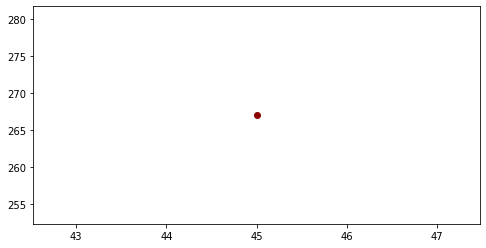

In [427]:
results = []
number_of_pos_pred=[]
# max_depth_options = [2,4,6,8,10,12,14,16,18,20,25,30,35,40,45,50,55]
max_depth_options = [45]
for trees in max_depth_options:
    model = DecisionTreeClassifier(max_depth=trees, random_state=101)
    model.fit(train_ws, train_y)
    y_pred_train = model.predict(train_ws)
    y_pred_dt_ws = model.predict(test_ws)
    accuracy = np.mean(train_y==y_pred_train)
    number_of_pos_pred.append(sum(y_pred_dt_ws==1))
    results.append(accuracy)
print('max pos: ',max(number_of_pos_pred))

print(y_pred_dt_ws)
plt.figure(figsize=(8,4))
pd.Series(number_of_pos_pred, max_depth_options).plot(color="darkred",marker="o")
plt.show()

max pos:  257
[257]


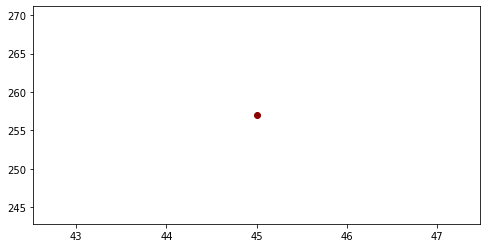

In [429]:
results = []
number_of_pos_pred=[]
# max_depth_options = [2,4,6,8,10,12,14,16,18,20,25,30,35,40,45,50,55]
max_depth_options = [45]
for trees in max_depth_options:
    model = DecisionTreeClassifier(max_depth=trees, random_state=101)
    model.fit(train_wot, train_y)
    y_pred_train = model.predict(train_wot)
    y_pred_dt_wot = model.predict(test_wot)
    accuracy = np.mean(train_y==y_pred_train)
    number_of_pos_pred.append(sum(y_pred_dt_wot==1))
    results.append(accuracy)
print('max pos: ',max(number_of_pos_pred))
print(number_of_pos_pred)
plt.figure(figsize=(8,4))
pd.Series(number_of_pos_pred, max_depth_options).plot(color="darkred",marker="o")

In [430]:
test_res=pd.read_csv('test.csv')
res=pd.concat([test_res.individualnumber,pd.DataFrame(y_pred_dt_ws,columns=['response'])],axis=1)
y_pred_dt_ws.shape
res.to_csv('results_dt_ws.csv',index=False)

In [431]:
test_res=pd.read_csv('test.csv')
res=pd.concat([test_res.individualnumber,pd.DataFrame(y_pred_dt_wot,columns=['response'])],axis=1)
res.to_csv('results_dt_wot.csv',index=False)

## **KNN**

In [432]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [436]:
results = []
number_of_pos_pred=[]
# nneighbors=[i for i in range(1,16)]
nneighbors=[1]
for i in nneighbors:    
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_ws, train_y)
    y_pred_train = model.predict(train_ws)
    y_pred_knn_ws = model.predict(test_ws)
    accuracy = np.mean(train_y==y_pred_train)
    number_of_pos_pred.append(sum(y_pred_knn_ws==1))
    results.append(accuracy)
print('max pos: ',max(number_of_pos_pred))
max_value = max(number_of_pos_pred)
print(nneighbors[number_of_pos_pred.index(max_value)])
# plt.figure(figsize=(8,4))
# pd.Series(number_of_pos_pred, nneighbors).plot(color="darkred",marker="o")

max pos:  239
1


In [437]:
test_res=pd.read_csv('test.csv')
res=pd.concat([test_res.individualnumber,pd.DataFrame(y_pred_knn_ws,columns=['response'])],axis=1)
res.to_csv('results_knn_ws.csv',index=False)

Text(0, 0.5, 'Error Rate')

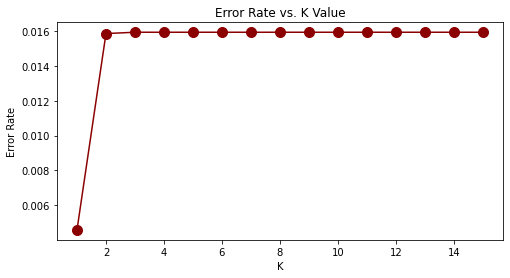

In [363]:
plt.figure(figsize=(8,4))
plt.plot(np.array(nneighbors),1-np.array(results),color='darkred', marker='o',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [453]:
results = []
number_of_pos_pred=[]
# nneighbors=[i for i in range(1,16)]
nneighbors=[1]
for i in nneighbors:    
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_wot, train_y)
    y_pred_train = model.predict(train_wot)
    y_pred_knn_wot = model.predict(test_wot)
    accuracy = np.mean(train_y==y_pred_train)
    number_of_pos_pred.append(sum(y_pred_knn_wot==1))
    results.append(accuracy)
print('max pos: ',max(number_of_pos_pred))
max_value = max(number_of_pos_pred)
print(nneighbors[number_of_pos_pred.index(max_value)])
# plt.figure(figsize=(8,4))
# pd.Series(number_of_pos_pred, nneighbors).plot(color="darkred",marker="o")

max pos:  250
1


In [454]:
test_res=pd.read_csv('test.csv')
res=pd.concat([test_res.individualnumber,pd.DataFrame(y_pred_knn_wot,columns=['response'])],axis=1)
res.to_csv('results_knn_wot.csv',index=False)

Text(0, 0.5, 'Error Rate')

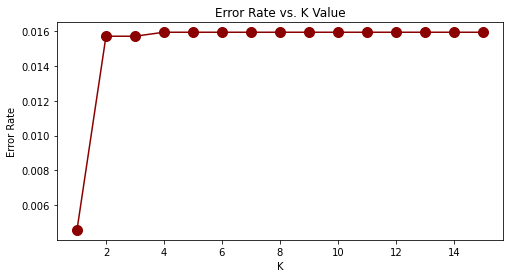

In [365]:
plt.figure(figsize=(8,4))
plt.plot(np.array(nneighbors),1-np.array(results),color='darkred', marker='o',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## **Logistic Regression**


In [366]:
from sklearn.linear_model import LogisticRegression

In [451]:
lr =  LogisticRegression()
lr.fit(train_ws, train_y)
y_pred=lr.predict(test_ws)
y_pred_train=lr.predict(train_ws)
sum(y_pred>=0.5)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0

In [368]:
lr =  LogisticRegression()
lr.fit(train_wot, train_y)
y_pred=lr.predict(test_wot)
y_pred_train=lr.predict(train_wot)
sum(y_pred==1)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0

## **Naive Bayes**

In [440]:
from sklearn.naive_bayes import GaussianNB

In [442]:
nb =  GaussianNB()
nb.fit(train_ws, train_y)
y_pred_nb=nb.predict(test_ws)
sum(y_pred_nb>=0.5)

114

In [444]:
test_res=pd.read_csv('test.csv')
res=pd.concat([test_res.individualnumber,pd.DataFrame(y_pred_nb,columns=['response'])],axis=1)
res.to_csv('results_nb_ws.csv',index=False)

In [443]:
nb =  GaussianNB()
nb.fit(train_wot, train_y)
y_pred=nb.predict(test_wot)
sum(y_pred==1)

104

## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=70, random_state=42)
clf.fit(train_ws,train_y)
train_preds=clf.predict(train_ws)
preds = clf.predict(test_ws)

(preds==1).sum()
accuracy= np.sqrt(accuracy_score(train_preds, train_y))
print("Accuracy : %f" % (accuracy))

In [448]:
results = []
number_of_pos_pred=[]
n_estimator_options = np.arange(5,250,5)
# n_estimator_options = []
for trees in n_estimator_options:
    model = RandomForestClassifier(trees, n_jobs=-1, random_state=101)
    model.fit(train_ws, train_y)
    y_pred_rf_ws = model.predict(test_ws)
    y_pred_train = model.predict(train_ws)
    accuracy = np.mean(y_pred_train==train_y)
    results.append(accuracy)
    number_of_pos_pred.append(sum(y_pred_rf_ws==1))
print('max pos: ',max(number_of_pos_pred))
max_value = max(number_of_pos_pred)
print(n_estimator_options[number_of_pos_pred.index(max_value)])
# plt.figure(figsize=(8,4))
# pd.Series(number_of_pos_pred, n_estimator_options).plot(color="darkred",marker="o")

max pos:  30
5


In [449]:
test_res=pd.read_csv('test.csv')
res=pd.concat([test_res.individualnumber,pd.DataFrame(y_pred_rf_ws,columns=['response'])],axis=1)
res.to_csv('results_rf_ws.csv',index=False)

In [418]:
results = []
number_of_pos_pred=[]
# n_estimator_options = np.arange(5,250,5)
n_estimator_options = [105]
for trees in n_estimator_options:
    model = RandomForestClassifier(trees, n_jobs=-1, random_state=101)
    model.fit(train_wot, train_y)
    y_pred_rf_wot = model.predict(test_wot)
    y_pred_train = model.predict(test_wot)
    accuracy = np.mean(y_pred_train==train_y)
    results.append(accuracy)
    number_of_pos_pred.append(sum(y_pred_rf_wot==1))
print('max pos: ',max(number_of_pos_pred))
max_value = max(number_of_pos_pred)
print(n_estimator_options[number_of_pos_pred.index(max_value)])
# plt.figure(figsize=(8,4))
# pd.Series(number_of_pos_pred, n_estimator_options).plot(color="darkred",marker="o")

max pos:  184
105


In [419]:
test_res=pd.read_csv('test.csv')
res=pd.concat([test_res.individualnumber,pd.DataFrame(y_pred_rf_wot,columns=['response'])],axis=1)
res.to_csv('results_rf_wot.csv',index=False)

## **Stochastic Gradient Descent**

In [375]:
from sklearn.linear_model import SGDClassifier

In [376]:
sgd =  SGDClassifier(loss='modified_huber', shuffle=True,random_state=101)
sgd.fit(train_ws, train_y)
y_pred=sgd.predict(test_ws)
sum(y_pred>=0.5)

0

In [377]:
sgd =  SGDClassifier(loss='modified_huber', shuffle=True,random_state=101)
sgd.fit(train_wot, train_y)
y_pred=sgd.predict(test_wot)
sum(y_pred>=0.5)

0

## **Support Vector Machine**

In [378]:
from sklearn.svm import SVC

In [379]:
svm =  SVC(kernel="rbf", C=0.025,random_state=101)
svm.fit(train_ws, train_y)
y_pred=svm.predict(test_ws)
print(sum(y_pred==1))
svm =  SVC(kernel="linear", C=0.025,random_state=101)
svm.fit(train_ws, train_y)
y_pred=svm.predict(test_ws)
print(sum(y_pred==1))
svm =  SVC(kernel="poly", C=0.025,random_state=101)
svm.fit(train_ws, train_y)
y_pred=svm.predict(test_ws)
print(sum(y_pred==1))

0
0
0


In [380]:
svm =  SVC(kernel="rbf", C=0.025,random_state=101)
svm.fit(train_wot, train_y)
y_pred=svm.predict(test_wot)
print(sum(y_pred==1))
svm =  SVC(kernel="linear", C=0.025,random_state=101)
svm.fit(train_wot, train_y)
y_pred=svm.predict(test_wot)
print(sum(y_pred==1))
svm =  SVC(kernel="poly", C=0.025,random_state=101)
svm.fit(train_wot, train_y)
y_pred=svm.predict(test_wot)
print(sum(y_pred==1))

0
1
0


## **Neural Network**

In [381]:
import keras
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.models import Sequential
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, KFold

In [382]:

def get_nn_model(hiddenLayerOne=500, hiddenLayerTwo=400,dropout=0.3, learnRate=0.3):
  model = Sequential()
  model.add(Dense(hiddenLayerOne, input_shape=(16,), activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(hiddenLayerTwo, activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam')
  return model

estimator = get_nn_model()
estimator.fit(x=train_ws, y=train_y, batch_size=16,epochs=10,validation_split=0.2, verbose=0)
test_predictions=estimator.predict(test_ws)

sum(test_predictions>=0.5)

410/410 [==============================] - 1s 2ms/step


array([0])

In [ ]:
# model = KerasClassifier(build_fn=get_nn_model, verbose=0)
# hiddenLayerOne = np.arange(100,650,100)
# hiddenLayerTwo = np.arange(100,650,100)
# learnRate = np.linspace(0.00001,0.1,10,endpoint=True)
# # dropout = np.linspace(0.2,0.9,8,endpoint=True)
# # batchSize = [32,64,128,256]
# # epochs = [10, 20, 30]
# # hiddenLayerTwo=hiddenLayerTwo
# # dropout=dropout
# # batch_size=batchSize
# # epochs=epochs
# # validation_split=np.linspace(0.2,0.9,8,endpoint=True)
# # # create a dictionary from the hyperparameter grid
# grid = dict(
# 	# dropout=[0.8],
# 	# epochs=[20],
# 	batch_size=[32],
# 	hiddenLayerOne=hiddenLayerOne,
# 	hiddenLayerTwo=hiddenLayerTwo,
#   learnRate= learnRate
# )
# # print("[INFO] performing random search...")
# searcher = GridSearchCV(estimator=model, n_jobs=-1, cv=KFold(shuffle=True,n_splits=5,random_state=412),
# 	param_grid=grid, scoring="neg_root_mean_squared_error")
# searchResults = searcher.fit(train_ws, train_y)
# # # summarize grid search information
# bestParams = searchResults.best_params_
# print("[INFO] best param is {}".format(bestParams))